<a href="https://colab.research.google.com/github/baschram/bda-718-group-1/blob/master/IST-718%20Fall%202020%20Homework%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Grading Feedback Cell

# IST 718: Big Data Analytics

- Professor: Willard Williamson <wewillia@syr.edu>
- Faculty Assistant: Vidushi Mishra <vmishr01@syr.edu>
- Faculty Assistant: Pranav Kottoli Radhakrishna <pkottoli@syr.edu>
## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- There could be tests in some cells (i.e., `assert` and `np.testing.` statements). These tests (if present) are used to grade your answers. **However, the professor and FAs could use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before submitting your work, remember to check for run time errors with the following procedure:
`Kernel`$\rightarrow$`Restart and Run All`.  All runtime errors will result in a minimum penalty of half off.
- Data Bricks is the official class runtime environment so you should test your code on Data Bricks before submission.  If there is a runtime problem in the grading environment, we will try your code on Data Bricks before making a final grading decision.
- All plots shall include descriptinve title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.  It is understood that spark data structures must be converted to something like numpy or pandas prior to making plots.  All required mathematical operations, filtering, selection, etc., required by a homework question shall be performed in spark prior to converting to numpy or pandas.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- We reserve the right to take points off for operations that are extremely inefficient or "heavy weight".  This is a big data class and extremely inefficient operations make a big difference when scaling up to large data sets.  For example, the spark dataframe collect() method is a very heavy weight operation and should not be used unless it there is a real need for it.  An example where collect() might be needed is to get ready to make a plot after filtering a spark dataframe.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need.
- If you perform databricks specific operations, you MUST protect those operations in an if statement by calling the is_databricks() function provided in all homework assignments.  For example, if you use dbutils (databricks utilities), only run dbutils commands if is_databricks() returns true.  Runtime errors created in the grading environment by not protecting databricks specific commands in an if statement will result in a runtime error points deduction. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  Oftentimes there is a large disparity between the level of effort between students who are trying learn, and students who are trying to do the minimum possible to check off an assignment requirement.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who did put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Only use spark, spark machine learning, spark data frames, RDD's, and map reduce to solve all problems unless instructed otherwise.
- Unless code is provided which reads data files, __you must use the get_training_filename function povided below to read data files."  Runtime errors encountered while grading caused by students not using get_training_filename will result in a minimum of half points off for the problem in question.__

In [24]:
%%bash

# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already isntalled
pip install pyspark

# Download tweets.csv from github
# If the tweets.csv file does not exist in the colab environment
if [[ ! -f ./tweets.csv ]]; then 
   # download tweets.csv file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/tweets.csv   
fi

# vefify tweets.csv exits in the colab env - should not print an error message
ls tweets.csv

tweets.csv


In [25]:
# import statements
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [26]:
# example code to read the downloaded tweets.csv file on colab
tweets_df = spark.read.format("csv").option("header", "true").load("tweets.csv")
tweets_df.take(5)

[Row(target='4', id='1467822272', date='Mon Apr 06 22:22:45 PDT 2009', flag='NO_QUERY', user='ersle', text='I LOVE @Health4UandPets u guys r the best!! '),
 Row(target='4', id='1467822273', date='Mon Apr 06 22:22:45 PDT 2009', flag='NO_QUERY', user='becca210', text='im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!'),
 Row(target='4', id='1467822283', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='Wingman29', text='@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. '),
 Row(target='4', id='1467822287', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='katarinka', text='Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup'),
 Row(target='4', id='1467822293', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='_EmilyYoung', text='@LovesBrooklyn2 he has that effect on everyone ')]

What problems did you have with colab? Your comments here:

In [27]:
# Do not delete or change this cell

enable_grid = True

# grading import statements
%matplotlib inline
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "dbfs:/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

# Sentiment Analysis
In this assignment, you will use the tweets.csv file to perform sentiment analysis. The tweets.csv file contains the following columns:
- target: the polarity of the tweet (0 = negative, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

# Qustion 1: (10 pts)
Read tweets.csv into a spark dataframe named `tweets_df`.  Solutions that do not use `get_training_filename` will be heavily penalized.  Drop all columns except target and text.  Transform the target column such that a negative sentiment is equal to 0 and a positive sentiment is equal to 1.  Determine and print the percentage of positive and negative tweets in the dataframe such that it's easy for the graders to find and interpret your data.

In [28]:
# your code here
from pyspark.sql import functions as fn

#tweets_df = spark.read.format("csv").option("header", "true").load(get_training_filename("tweets.csv"))
tweets_df = tweets_df.drop('id').drop('date').drop('flag').drop('user')

#Transform 4 polarity to 1, negative polarity already correct
tweets_df = tweets_df.withColumn('target',fn.translate('target','4','1'))
tweets_df = tweets_df.withColumn('target', fn.col('target').cast('long'))


#Validate transform
tweets_df.select('target').distinct().show()

#Need to print percentages
percent = tweets_df.groupBy("target").agg(fn.count('*').alias("count"))
total = percent.agg(fn.sum('count')).first()[0]
percent = percent.withColumn('percentage',fn.col('count')/total)

percent.show()

+------+
|target|
+------+
|     0|
|     1|
+------+

+------+-----+----------+
|target|count|percentage|
+------+-----+----------+
|     0|50000|       0.5|
|     1|50000|       0.5|
+------+-----+----------+



In [29]:
# grading cell do not modify
tweets_pd = tweets_df.toPandas()
display(tweets_pd.head())
print(tweets_pd.shape)

,target,text
0,1,I LOVE @Health4UandPets u guys r the best!!
1,1,im meeting up with one of my besties tonight! ...
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,1,Being sick can be really cheap when it hurts t...
4,1,@LovesBrooklyn2 he has that effect on everyone


(100000, 2)


##### Grading Feedback Cell

# Question 2: (10 pts)
Pre-process the data by creating a pipeline named `tweets_pre_proc_pipe`. Your pipeline should tokenize, remove stop words, and do a TF-IDF transformation.  Fit and execute your pipeline, and create a new dataframe named `tweets_pre_proc_df`.  Print the shape of the resulting TF-IDF data such that it's easy for the graders to find and understand as num rows x num words. Based on the shape of the TF-IDF data, would you expect a logistic regression model to overfit?

In [30]:
# your code here
from pyspark.ml import Pipeline
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, IDF
from requests import get


stop_words = get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()

tokenizer = Tokenizer().setInputCol('text').setOutputCol('words')

sw_filter = StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("filtered")

cv = CountVectorizer(minTF=1., minDF=5., vocabSize=2**17)\
  .setInputCol("filtered")\
  .setOutputCol("tf")

idf = IDF().\
    setInputCol('tf').\
    setOutputCol('tfidf')

tweets_pre_proc_pipe = Pipeline(stages=[tokenizer,sw_filter,cv,idf]).fit(tweets_df)

tweets_pre_proc_df = tweets_pre_proc_pipe.transform(tweets_df)

vocabulary = tweets_pre_proc_pipe.stages[-2].vocabulary
print("num rows:", tweets_df.count())
print("num columns:", len(vocabulary))




num rows: 100000
num columns: 13693


In [31]:
# grading cell do not modify
display(tweets_pre_proc_df.toPandas().head())

,target,text,words,filtered,tf,tfidf
0,1,I LOVE @Health4UandPets u guys r the best!!,"[i, love, @health4uandpets, u, guys, r, the, b...","[love, @health4uandpets, u, guys, r, best!!]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,im meeting up with one of my besties tonight! ...,"[im, meeting, up, with, one, of, my, besties, ...","[im, meeting, besties, tonight!, wait!!, , -, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(1.1265280578718189, 0.0, 0.0, 0.0, 0.0, 3.183..."
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S...","[@darealsunisakim, thanks, for, the, twitter, ...","[@darealsunisakim, thanks, twitter, add,, suni...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1,Being sick can be really cheap when it hurts t...,"[being, sick, can, be, really, cheap, when, it...","[sick, really, cheap, hurts, eat, real, food, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.1265280578718189, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1,@LovesBrooklyn2 he has that effect on everyone,"[@lovesbrooklyn2, he, has, that, effect, on, e...","[@lovesbrooklyn2, effect]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Your explanation here: I do not expect a logistic regression model to overfit because there are a greater number of rows (tweets) in the data set that there are columns (individual words).  The number of tweets are an order of magnitiude greater than the vocabulary and even if splitting the data into a training and testing sets, there should be suffcient number of rows in the training set to avoid overfitting.

##### Grading Feedback Cell

# Question 3: (10 pts)
Since IDF considers a word's frequency across all documents in a corpus, you can use IDF as a form of inference.  Examine the documentation for the spark ML object that you used to create TF-IDF scores and learn how to extract the IDF scores for words in the corpus.  Create a pandas dataframe containing the 5 most important IDF scores named `most_imp_idf`.  Create another pandas dataframe containing the 5 least important IDF scores named `least_imp_idf`.  Each dataframe shall have 2 columns named `word` and `idf_score`.  Explain in words your interpretation of what the IDF scores mean.

In [32]:
# your code here
idf = tweets_pre_proc_pipe.stages[-1].idf.tolist()
vocab = tweets_pre_proc_pipe.stages[-2].vocabulary

idfcol = ['word','idf_score']

idf_df = spark.createDataFrame(data=zip(vocab,idf),schema = idfcol)

most_imp_idf = idf_df.sort(fn.desc('idf_score')).limit(5).toPandas()
least_imp_idf = idf_df.sort('idf_score').limit(5).toPandas()


In [33]:
# grading cell do not modify
display(most_imp_idf)
display(least_imp_idf)

,word,idf_score
0,thks,9.721176
1,aku,9.721176
2,(8),9.721176
3,but..,9.721176
4,"broke,",9.721176


,word,idf_score
0,,1.126528
1,just,2.588812
2,i'm,2.645649
3,good,3.015945
4,like,3.113850


Your explanation here: The least important IDF words occur frequently within and across the range of documents so their scores are discounted as they do not provide much meaning because they are so common.  The most important words occur less frequently across the documents and therefore may provide a better indication of sentiment (poisitive or negative) if encountered.

##### Grading Feedback Cell

# Question 4: (10 pts)
Create a new recursive pipeline named `lr_pipe` which starts with `tweets_pre_proc_pipe` and adds a logistic regression model using default hyper parameters.  Fit lr_pipe using `tweets_df`.  Score the model using ROC AUC.  Report the resulting AUC such that it is easy for graders to find and interpret.

In [34]:
# your code here
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

training_df, validation_df, testing_df = tweets_df.randomSplit([0.6, 0.3, 0.1], seed=0)

lr = LogisticRegression(labelCol='target',featuresCol='tfidf')

lr_pipe = Pipeline(stages = [tweets_pre_proc_pipe,lr]).fit(training_df)

evaluator = BinaryClassificationEvaluator(labelCol='target',metricName = 'areaUnderROC')

score_lr_pipe = evaluator.evaluate(lr_pipe.transform(validation_df))

print('Area under ROC: ', score_lr_pipe)


Area under ROC:  0.7302971442176194


##### Grading Feedback Cell

# Question 5: (10 pts)
Create 2 pandas dataframes named `lr_pipe_df_neg` and `lr_pipe_df_pos`which contain 2 colunms: `word` and `score`.  Load the 2 dataframes with the top 10 words and logistic regression coefficients that contribute the most to negative and positive sentiments respectively. Analyze the 2 dataframes and describe if the words make sense.  Do the words look like they are really negative and positive?

In [35]:
# your code here
import pandas as pd
vocabulary = lr_pipe.stages[0].stages[-2].vocabulary
score = lr_pipe.stages[-1].coefficients.tolist()

datacol = ['word','score']

coeffs_df = spark.createDataFrame(data=zip(vocabulary,score),schema = datacol)

lr_pipe_df_pos = coeffs_df.sort(fn.desc('score')).limit(10).toPandas()
lr_pipe_df_neg = coeffs_df.sort('score').limit(10).toPandas()

#coeffs_df = pd.DataFrame({'word':vocabulary,'score':score})

#lr_pipe_df_pos = coeffs_df.sort_values('score', ascending=False).head(10)
#lr_pipe_df_neg = coeffs_df.sort_values('score').head(10)

In [36]:
# grading cell - do not modify
display(lr_pipe_df_neg)
display(lr_pipe_df_pos)

,word,score
0,adopted,-8.641777
1,selfish,-8.157059
2,depressed,-6.644970
3,update:,-6.311959
4,brutal,-6.265906
5,@milliemagsaysay,-6.040053
6,pirates,-5.925209
7,why'd,-5.904686
8,dec,-5.894391
9,last!,-5.765711


,word,score
0,ja,7.734643
1,lotr,7.166360
2,pizza?,6.978478
3,participating,6.635875
4,ride!,6.511661
5,anyway..,5.679254
6,marvelous,5.619924
7,demi.,5.526293
8,ch?,5.113280
9,"kidding,",5.059666


Your explanation here: Both dataframes contain some words that do not correlate to positive or negative sentiment.  For example in the positive dataframe, it has 'maybe', 'ugh', and 'c.', that do not indicate positivity.  In the negative dataframe, 'chrisptoher', the web url, 'tours', 'lung' don't seem to make sense as negative words.

##### Grading Feedback Cell

# Question 6a: (5 pts)
The goal of this question is to try to improve the score from question 4 using a regularization grid search on a new pipeline named `lr_pipe_1`. lr_pipe_1 is the same as lr_pipe above but we would like you to create a new pipe for grading purposes only.  I'm not sure if it's possible to increase the score or not.  You will be graded on level of effort to increase the score in relation to other students in the class.  All of your grid search code should be inside the `if enable_grid` statement in the cell below.  The enable_grid boolean is set to true in a grading cell above.  If any of the grid search code executes outside of the if statement, you will not get full credit for the question.  We want the ability to turn off the grid search during grading.<br>

In [37]:
enable_grid = True

In [38]:
# your grid search (and only your grid search) code here
if enable_grid:
    # your grid search code here
    from pyspark.ml.tuning import ParamGridBuilder
    lr_1 = LogisticRegression(labelCol='target',featuresCol='tfidf')
    
    grid = ParamGridBuilder().\
    addGrid(lr_1.regParam, [0., 0.01, 0.02]).\
    addGrid(lr_1.elasticNetParam, [0., 0.1, 0.2, 0.3, 0.4]).\
    build()
    
    lr_pipe_1 = Pipeline(stages = [tweets_pre_proc_pipe,lr_1])
    
    all_models = []
    for j in range(len(grid)):
      print("Fitting model {}".format(j+1))
      model = lr_pipe_1.fit(training_df, grid[j])
      all_models.append(model)
    
    scores =[]
    for m in all_models:
      score_lr_pipe_1 = BinaryClassificationEvaluator(labelCol='target',metricName = 'areaUnderROC').evaluate(m.transform(validation_df))
      scores.append(score_lr_pipe_1)
      
    print(grid[scores.index(max(scores))])
    pass

Fitting model 1
Fitting model 2
Fitting model 3
Fitting model 4
Fitting model 5
Fitting model 6
Fitting model 7
Fitting model 8
Fitting model 9
Fitting model 10
Fitting model 11
Fitting model 12
Fitting model 13
Fitting model 14
Fitting model 15
{Param(parent='LogisticRegression_a09ed8e38a1a', name='regParam', doc='regularization parameter (>= 0).'): 0.02, Param(parent='LogisticRegression_a09ed8e38a1a', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.1}


##### Grading feedback cell

# Question 6b (5 pts)
Build a new pipeline named `lr_pipe_2` which uses the optimized model parameters from the grid search in question 6a above (the best model).  Create 2 variables named alpha and lambda and assign to them the best alpha and lambda produced by the grid search by hard coding the values. Fit and transform lr_pipe_2.  Compare AUC scores between lr_pipe_2 with lr_pipe in question 4.  Create a pandas dataframe named `comapre_1_df` which encapsulates the comparison data.  comapre_1_df Shall have 2 columns: `model_name` and `auc_score`.

In [39]:
# your optimized model code here
alpha_par = 0.1
lambda_par = 0.02

# lr_pipe_2 code here
en_lr = LogisticRegression(labelCol='target',featuresCol='tfidf',regParam=lambda_par, elasticNetParam=alpha_par)

lr_pipe_2 = Pipeline(stages = [tweets_pre_proc_pipe,en_lr]).fit(training_df)

score_pipe_2 = evaluator.evaluate(lr_pipe_2.transform(validation_df))

comapre_1_df = pd.DataFrame([['lr_pipe', score_lr_pipe],['lr_pipe_2',score_pipe_2]],columns=['model_name','auc_score'])



In [40]:
# grading cell - do not modify
display(comapre_1_df)

,model_name,auc_score
0,lr_pipe,0.730297
1,lr_pipe_2,0.816809


##### Grading Feedback Cell

# Question 7 (10 pts)
Perform inference on lr_pipe_2.  Write code to report how many words were eliminated from the best model in question 6b above (if any) as compared to the model in question 4 above.  Make sure your output is easy for the graders to find and interpret.

In [41]:
# your code here
vocabulary_1 = lr_pipe_2.stages[0].stages[-2].vocabulary
score_1 = lr_pipe_2.stages[-1].coefficients.toArray().tolist()

datacol = ['word','score']

coeffs_df_1 = spark.createDataFrame(data=zip(vocabulary_1,score_1),schema = datacol)

print('Number of Words Removed from Best Model: ',coeffs_df_1.where(coeffs_df_1['score']==0).count(),'\nPercent Recdution: ', coeffs_df_1.where(coeffs_df_1['score']==0).count()/coeffs_df_1.count())



Number of Words Removed from Best Model:  9012 
Percent Recdution:  0.6581464982107647


##### Grading Feedback Cell

# Question 8 (10 pts)
Perform the same inference analysis that you did in question 5 but name the data frames `lr_pipe_df_neg_1` and `lr_pipe_df_pos_1`.  Compare the word importance results with the results in question 5.

In [42]:
# your code here
vocabulary_1 = lr_pipe_2.stages[0].stages[-2].vocabulary
score_1 = lr_pipe_2.stages[-1].coefficients.toArray().tolist()

datacol = ['word','score']

coeffs_df_1 = spark.createDataFrame(data=zip(vocabulary_1,score_1),schema = datacol)

lr_pipe_df_pos_1 = coeffs_df_1.sort(fn.desc('score')).limit(10).toPandas()
lr_pipe_df_neg_1 = coeffs_df_1.sort('score').limit(10).toPandas()

#coeffs_df = pd.DataFrame({'word':vocabulary,'score':score})

#lr_pipe_df_pos_1 = coeffs_df.sort_values('score', ascending=False).head(10)
#lr_pipe_df_neg_1 = coeffs_df.sort_values('score').head(10)

In [43]:
# grading cell - do not modify
display(lr_pipe_df_neg_1)
display(lr_pipe_df_pos_1)

,word,score
0,sad,-0.450782
1,miss,-0.330157
2,poor,-0.328874
3,wish,-0.323344
4,missing,-0.315183
5,sick,-0.308480
6,hurts,-0.305853
7,sucks,-0.304261
8,lost,-0.287978
9,sad.,-0.283056


,word,score
0,thanks,0.308825
1,guilt,0.283446
2,thank,0.281859
3,welcome,0.272772
4,owners,0.253157
5,wiff,0.247450
6,good,0.237222
7,kiddos,0.234237
8,peaceful,0.227550
9,@jonthanjay,0.224960


##### Grading Feedback Cell

Your explanation here:By removing the unneeded words from the model, the negative and postive words inference makes much more sense.  Now instead of having words that do not seem to relate as in Q5, you are left with words that intuitively relate to being positive or negative.

##### Grading Feedback Cell

# Question 9 (10 pts)
Create a receiver operating characteristic (ROC) plot for the best model in question 6.  Briefly describe in words the high level steps needed to build a ROC curve as outlined in lecture.  Convince me you understand the high level steps needed to make a ROC curve.

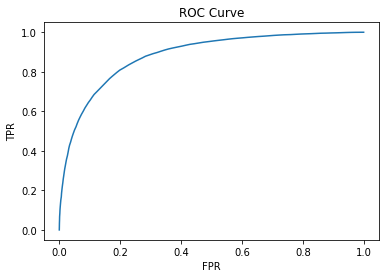

In [44]:
# your code here
import matplotlib.pyplot as plt

plt.plot(lr_pipe_2.stages[-1].summary.roc.select('FPR').collect(),
         lr_pipe_2.stages[-1].summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()


Your explanation here:To construct an ROC curve you iterate hundreds to thousands of times over the possible probability thresholds that a model predicts an outcome and calculate the true positive rate and false positive rate using a given threshold.  In this case predicting, the probability of a tweet being positive. You use each probability theshold to create a confusion matrix to calculate the TPR and FPR (e.g. model predicts this tweet as .6 probability of being positive, threshold is .5 so tweet is marked positive.  Then compare it to the true condition to fill in confusion matrix).  Then all points are plotted using TPR and FPR as y and x coordinates for each threshold value.

##### Grading Feedback Cell

# Question 10 (10 pts)
Learn about [precision/recall](https://en.wikipedia.org/wiki/Precision_and_recall) curves. Using the logistic regression summary object contained in the linear regression object within lr_pipe_2, create a precision recall plot. Similar to the `roc` object which is available in the logistic regression summary, there is a `pr` object which can be used to help create a precision / recall curve.  Note that the precision recall curve is built using the same high level methodology as the ROC curve, but using different metrics calculated from the confusion matrix.  If you understand how a ROC curve is built, you understand how a precision / recall curve is built.  Compare and contrast the differences between precision / recall and ROC curves.  What axis is common and what axis is different between the 2 curves?

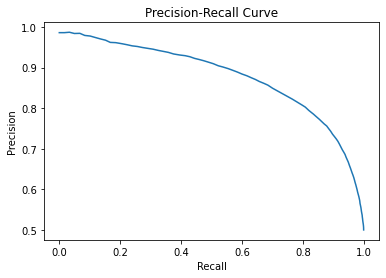

In [46]:
# your code here
import matplotlib.pyplot as plt

plt.plot(lr_pipe_2.stages[-1].summary.pr.select('Recall').collect(),
         lr_pipe_2.stages[-1].summary.pr.select('Precision').collect())
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Your explanation here:

##### Grading Feedback Cell